In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import boto3
import pandas as pd
from io import StringIO

In [3]:
bucketname = "clustertraces"
file_key="borg_traces_data.csv"

#creating a boto3 client
s3=boto3.client("s3")

#object tracing
response = s3.get_object(Bucket=bucketname, Key=file_key)

#load CSV
csv_content=response["Body"].read().decode("utf-8")

#Creating the dataframe
df=pd.read_csv(StringIO(csv_content))

In [4]:
# Increase the maximum number of rows displayed
pd.set_option('display.max_rows', 200)

# Increase the maximum number of columns displayed
pd.set_option('display.max_columns', 50)

In [5]:
df.head()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,constraint,collections_events_type,user,collection_name,collection_logical_name,start_after_collection_ids,vertical_scaling,scheduler,start_time,end_time,average_usage,maximum_usage,random_sample_usage,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",[],2,fn8Ve4Tdl/FVVvwXFGIKe4+Wo4zLjUL/557qdFVYu5M=,Hzsv/gF8CPQXdqpsfovDTC1TJNyphDxPu7vaTeNxA74=,YCuhYrnORLiUh9WGL5q5tkBevfwtucSnFr2qPZh6Kes=,[],1.0,0.0,274800000000,275100000000,"{'cpus': 0.00466156005859375, 'memory': 0.0059...","{'cpus': 0.01190185546875, 'memory': 0.0059356...","{'cpus': 0.0043487548828125, 'memory': None}",0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",[],2,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,hDGffcrF/rhQQEG8Uns/RMUK7R15DXjFnRasoKFhefI=,wcRcAMuop2OqH9EW4feH919tadFec5a11ply0hcS/C8=,[],2.0,0.0,1800713000000,1800714000000,"{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': None}",0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",[],6,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,kk6+maA6fvAdJ+VTU8AcpzQPTyVrx+ySt0MXRAyO8FU=,zCA2dl2PDptd82Hob906gE82JHzx0SbqA4mZurqZdmY=,[],2.0,1.0,81300000000,81600000000,"{'cpus': 0.024200439453125, 'memory': 0.002788...","{'cpus': 0.06005859375, 'memory': 0.0028457641...","{'cpus': 0.026458740234375, 'memory': None}",0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",[],2,8qRmTJas/6XEBaA0l4Wt1+/qSLgc6p7u7JzoMSuT/M8=,fypwFjdqaQPSxCfeqVPCBAvFcnntmkRpQxwQ/vJsCxU=,uNjMQD1+DL9IgCFckx8lHOsCbyvLgKmZCmRjiyWZNhk=,[],2.0,0.0,1075500000000,1075800000000,"{'cpus': 0.047607421875, 'memory': 0.034423828...","{'cpus': 0.13330078125, 'memory': 0.03466796875}","{'cpus': 0.05084228515625, 'memory': None}",0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",[],3,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,WS2kraTQdfsFtOIepw9SIo7ETi2ag8uwy7gt2MrpIe0=,VJ0ExwthLLpbqbyOA77EoNypzEiPYg3mECxUve0GCnY=,[],3.0,0.0,1565315000000,1565317000000,"{'cpus': 0.000270843505859375, 'memory': 7.629...","{'cpus': 0.00041484832763671875, 'memory': 7.6...","{'cpus': 0.0003414154052734375, 'memory': None}",0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [6]:
df.describe()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,collections_events_type,vertical_scaling,scheduler,start_time,end_time,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cluster,failed
count,405894.000000,4.058940e+05,405894.000000,4.058940e+05,405894.000000,405894.000000,405894.000000,4.058940e+05,405894.000000,4.058940e+05,405894.000000,404935.000000,404935.000000,4.058940e+05,4.058940e+05,405894.000000,405894.000000,281206.000000,281206.000000,405894.000000,405894.000000,405894.000000
mean,202946.500000,6.927465e+13,2.945983,3.590897e+11,1.266870,0.087782,147.913793,7.021801e+10,5034.756259,8.491885e+10,2.945983,1.858740,0.370422,1.238422e+12,1.238634e+12,0.008927,0.000398,2.185379,0.010722,0.999223,4.563613,0.228331
std,117171.649418,2.507511e+16,2.045794,2.446122e+11,1.014087,0.282977,116.656633,1.673475e+11,11848.537486,1.377903e+11,2.045794,0.754768,0.482918,7.965088e+11,7.965134e+11,0.024937,0.000550,1.256117,0.007753,0.010239,2.208008,0.419757
min,0.000000,0.000000e+00,0.000000,6.824000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000,1.000000,0.000000,3.000000e+08,6.000000e+08,0.000000,0.000000,0.252846,0.000125,0.110000,1.000000,0.000000
25%,101473.250000,2.674747e+11,2.000000,2.125496e+11,0.000000,0.000000,103.000000,0.000000e+00,401.000000,2.932044e+09,2.000000,1.000000,0.000000,5.219700e+11,5.219710e+11,0.000196,0.000008,1.067229,0.004329,1.000000,3.000000,0.000000
50%,202946.500000,1.084800e+12,3.000000,3.108868e+11,1.000000,0.000000,105.000000,0.000000e+00,1380.000000,2.008985e+10,3.000000,2.000000,0.000000,1.274400e+12,1.274509e+12,0.002693,0.000227,1.918681,0.009506,1.000000,5.000000,0.000000
75%,304419.750000,1.766117e+12,5.000000,4.918812e+11,2.000000,0.000000,200.000000,0.000000e+00,4200.000000,1.318590e+11,5.000000,2.000000,1.000000,1.944000e+12,1.944300e+12,0.006683,0.000539,3.156894,0.016435,1.000000,6.000000,0.000000
max,405893.000000,9.223372e+18,10.000000,8.258532e+11,3.000000,1.000000,450.000000,7.426667e+11,177107.000000,8.254274e+11,10.000000,3.000000,1.000000,2.678400e+12,2.678700e+12,0.286133,0.008453,105.275932,0.084292,1.000000,8.000000,1.000000


In [7]:
df.isnull().sum()

Unnamed: 0                              0
time                                    0
instance_events_type                    0
collection_id                           0
scheduling_class                        0
collection_type                         0
priority                                0
alloc_collection_id                     0
instance_index                          0
machine_id                              0
resource_request                      774
constraint                              0
collections_events_type                 0
user                                    0
collection_name                         0
collection_logical_name                 0
start_after_collection_ids              0
vertical_scaling                      959
scheduler                             959
start_time                              0
end_time                                0
average_usage                           0
maximum_usage                           0
random_sample_usage               

**Columns like cycles_per_instruction and memory_accesses_per_instruction offer little value when missing in almost all rows. These fields are likely telemetry data, and their near-total absence means the model would learn noise or constant values if we imputed them.**

In [8]:
df.drop(['cycles_per_instruction', 'memory_accesses_per_instruction'], axis=1, inplace=True)


**We impute lower perentage of missing values with median. Median handles skewed distributions better than mean, avoids outlier influence, and preserves distribution shape for classifiers**

In [9]:
df['vertical_scaling'].fillna(df['vertical_scaling'].median(), inplace=True)

**Mode imputation preserves categorical variable structure without introducing new categories.**

In [10]:
df['scheduler'].fillna(df['scheduler'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Unnamed: 0                       0
time                             0
instance_events_type             0
collection_id                    0
scheduling_class                 0
collection_type                  0
priority                         0
alloc_collection_id              0
instance_index                   0
machine_id                       0
resource_request               774
constraint                       0
collections_events_type          0
user                             0
collection_name                  0
collection_logical_name          0
start_after_collection_ids       0
vertical_scaling                 0
scheduler                        0
start_time                       0
end_time                         0
average_usage                    0
maximum_usage                    0
random_sample_usage              0
assigned_memory                  0
page_cache_memory                0
sample_rate                      0
cpu_usage_distribution           0
tail_cpu_usage_distr

In [12]:
df["resource_request"]

0         {'cpus': 0.020660400390625, 'memory': 0.014434...
1         {'cpus': 0.00724029541015625, 'memory': 0.0013...
2         {'cpus': 0.048583984375, 'memory': 0.004165649...
3         {'cpus': 0.0704345703125, 'memory': 0.04162597...
4         {'cpus': 0.00244903564453125, 'memory': 0.0002...
                                ...                        
405889    {'cpus': 0.03594970703125, 'memory': 0.0154876...
405890    {'cpus': 0.02197265625, 'memory': 0.0013027191...
405891    {'cpus': 0.1214599609375, 'memory': 0.08264160...
405892    {'cpus': 0.00566864013671875, 'memory': 0.0015...
405893    {'cpus': 0.01629638671875, 'memory': 0.0013027...
Name: resource_request, Length: 405894, dtype: object

In [13]:
import ast
def safe_parse(val):
    try:
        return ast.literal_eval(val)
    except:
        return None  # Keep it None if parsing fails

# Apply to full column
df['resource_request'] = df['resource_request'].apply(safe_parse)

In [14]:
df['resource_request'].head()

0    {'cpus': 0.020660400390625, 'memory': 0.014434...
1    {'cpus': 0.00724029541015625, 'memory': 0.0013...
2    {'cpus': 0.048583984375, 'memory': 0.004165649...
3    {'cpus': 0.0704345703125, 'memory': 0.04162597...
4    {'cpus': 0.00244903564453125, 'memory': 0.0002...
Name: resource_request, dtype: object

In [15]:
# Extract CPU and memory if parsed successfully
df['resource_cpus'] = df['resource_request'].apply(lambda x: x.get('cpus') if isinstance(x, dict) else None)
df['resource_memory'] = df['resource_request'].apply(lambda x: x.get('memory') if isinstance(x, dict) else None)

In [16]:
# Impute the actual missing values
df['resource_cpus'].fillna(df['resource_cpus'].median(), inplace=True)
df['resource_memory'].fillna(df['resource_memory'].median(), inplace=True)

In [17]:
# Drop original
df.drop('resource_request', axis=1, inplace=True)

In [18]:
df.isnull().sum()

Unnamed: 0                     0
time                           0
instance_events_type           0
collection_id                  0
scheduling_class               0
collection_type                0
priority                       0
alloc_collection_id            0
instance_index                 0
machine_id                     0
constraint                     0
collections_events_type        0
user                           0
collection_name                0
collection_logical_name        0
start_after_collection_ids     0
vertical_scaling               0
scheduler                      0
start_time                     0
end_time                       0
average_usage                  0
maximum_usage                  0
random_sample_usage            0
assigned_memory                0
page_cache_memory              0
sample_rate                    0
cpu_usage_distribution         0
tail_cpu_usage_distribution    0
cluster                        0
event                          0
failed    

In [19]:
df[['average_usage', 'maximum_usage', 'random_sample_usage']]

,average_usage,maximum_usage,random_sample_usage
0,"{'cpus': 0.00466156005859375, 'memory': 0.0059...","{'cpus': 0.01190185546875, 'memory': 0.0059356...","{'cpus': 0.0043487548828125, 'memory': None}"
1,"{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': 9.5367431640625e-07}","{'cpus': 0.0, 'memory': None}"
2,"{'cpus': 0.024200439453125, 'memory': 0.002788...","{'cpus': 0.06005859375, 'memory': 0.0028457641...","{'cpus': 0.026458740234375, 'memory': None}"
3,"{'cpus': 0.047607421875, 'memory': 0.034423828...","{'cpus': 0.13330078125, 'memory': 0.03466796875}","{'cpus': 0.05084228515625, 'memory': None}"
4,"{'cpus': 0.000270843505859375, 'memory': 7.629...","{'cpus': 0.00041484832763671875, 'memory': 7.6...","{'cpus': 0.0003414154052734375, 'memory': None}"
...,...,...,...
405889,"{'cpus': 0.01531982421875, 'memory': 0.0015010...","{'cpus': 0.04833984375, 'memory': 0.0018024444...","{'cpus': 0.0150604248046875, 'memory': None}"
405890,"{'cpus': 0.03814697265625, 'memory': 0.0199890...","{'cpus': 0.091796875, 'memory': 0.020477294921...","{'cpus': 0.03375244140625, 'memory': None}"
405891,"{'cpus': 0.0235595703125, 'memory': 0.07580566...","{'cpus': 0.0625, 'memory': 0.0758056640625}","{'cpus': 0.014373779296875, 'memory': None}"
405892,"{'cpus': 0.00600433349609375, 'memory': 0.0009...","{'cpus': 0.0184326171875, 'memory': 0.00138092...","{'cpus': 0.0088043212890625, 'memory': None}"


Since the above three columns have no missing values we will parse the data in these columns and preapre separate columns with the extracted data

In [20]:
import ast

for col in ['average_usage', 'maximum_usage', 'random_sample_usage']:
    df[col] = df[col].apply(ast.literal_eval)


In [21]:
avg_df = df['average_usage'].apply(pd.Series).add_prefix('average_usage_')
max_df = df['maximum_usage'].apply(pd.Series).add_prefix('maximum_usage_')
rand_df = df['random_sample_usage'].apply(pd.Series).add_prefix('random_sample_usage_')

In [22]:
#drop original cols
df = df.drop([ 'average_usage', 'maximum_usage', 'random_sample_usage'], axis=1)
df = pd.concat([df, avg_df, max_df, rand_df], axis=1)


In [23]:
df.columns

Index(['Unnamed: 0', 'time', 'instance_events_type', 'collection_id',
       'scheduling_class', 'collection_type', 'priority',
       'alloc_collection_id', 'instance_index', 'machine_id', 'constraint',
       'collections_events_type', 'user', 'collection_name',
       'collection_logical_name', 'start_after_collection_ids',
       'vertical_scaling', 'scheduler', 'start_time', 'end_time',
       'assigned_memory', 'page_cache_memory', 'sample_rate',
       'cpu_usage_distribution', 'tail_cpu_usage_distribution', 'cluster',
       'event', 'failed', 'resource_cpus', 'resource_memory',
       'average_usage_cpus', 'average_usage_memory', 'maximum_usage_cpus',
       'maximum_usage_memory', 'random_sample_usage_cpus',
       'random_sample_usage_memory'],
      dtype='object')

In [24]:
df.dtypes

Unnamed: 0                       int64
time                             int64
instance_events_type             int64
collection_id                    int64
scheduling_class                 int64
collection_type                  int64
priority                         int64
alloc_collection_id              int64
instance_index                   int64
machine_id                       int64
constraint                      object
collections_events_type          int64
user                            object
collection_name                 object
collection_logical_name         object
start_after_collection_ids      object
vertical_scaling               float64
scheduler                      float64
start_time                       int64
end_time                         int64
assigned_memory                float64
page_cache_memory              float64
sample_rate                    float64
cpu_usage_distribution          object
tail_cpu_usage_distribution     object
cluster                  

## Dropping features unlikely to help with prediction

In [25]:
df.drop(['constraint','user','collection_name','collection_logical_name','start_after_collection_ids','cpu_usage_distribution','tail_cpu_usage_distribution'], axis=1, inplace=True)

In [26]:
df.columns

Index(['Unnamed: 0', 'time', 'instance_events_type', 'collection_id',
       'scheduling_class', 'collection_type', 'priority',
       'alloc_collection_id', 'instance_index', 'machine_id',
       'collections_events_type', 'vertical_scaling', 'scheduler',
       'start_time', 'end_time', 'assigned_memory', 'page_cache_memory',
       'sample_rate', 'cluster', 'event', 'failed', 'resource_cpus',
       'resource_memory', 'average_usage_cpus', 'average_usage_memory',
       'maximum_usage_cpus', 'maximum_usage_memory',
       'random_sample_usage_cpus', 'random_sample_usage_memory'],
      dtype='object')

Since event is a useful label,we apply label encoding

In [27]:
df['event']

0             FAIL
1             FAIL
2         SCHEDULE
3             FAIL
4           FINISH
            ...   
405889        FAIL
405890      ENABLE
405891      FINISH
405892        FAIL
405893        LOST
Name: event, Length: 405894, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder
df['event'] = LabelEncoder().fit_transform(df['event'].astype(str))

In [29]:
df['event']

0         2
1         2
2         7
3         2
4         3
         ..
405889    2
405890    0
405891    3
405892    2
405893    5
Name: event, Length: 405894, dtype: int64

In [30]:
#final check for dtypes
df.dtypes

Unnamed: 0                      int64
time                            int64
instance_events_type            int64
collection_id                   int64
scheduling_class                int64
collection_type                 int64
priority                        int64
alloc_collection_id             int64
instance_index                  int64
machine_id                      int64
collections_events_type         int64
vertical_scaling              float64
scheduler                     float64
start_time                      int64
end_time                        int64
assigned_memory               float64
page_cache_memory             float64
sample_rate                   float64
cluster                         int64
event                           int64
failed                          int64
resource_cpus                 float64
resource_memory               float64
average_usage_cpus            float64
average_usage_memory          float64
maximum_usage_cpus            float64
maximum_usag

Matplotlib is building the font cache; this may take a moment.


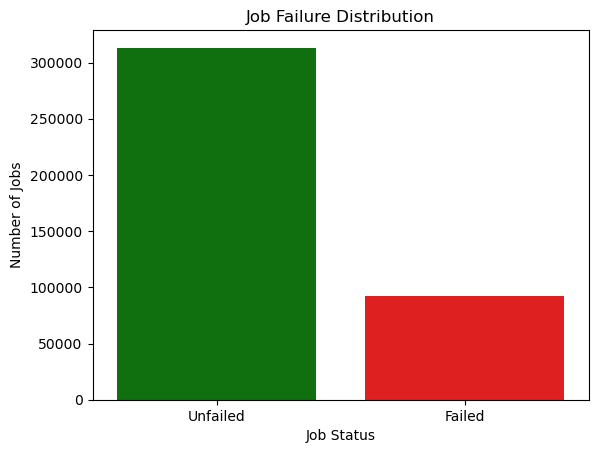

In [31]:
#check for data imbalance
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='failed', data=df, palette=['green', 'red'])
plt.xticks([0, 1], ['Unfailed', 'Failed'])
plt.title('Job Failure Distribution')
plt.ylabel('Number of Jobs')
plt.xlabel('Job Status')
plt.show()

In [32]:
#Since in above figure we can see some imbalance, its better to checkthe count of failed jobs for treating the imbalance better
df['failed'].value_counts()

failed
0    313216
1     92678
Name: count, dtype: int64

This is a binary classification task where the class distribution is:

Class 0: ~77%

Class 1: ~23%

So it's mildly imbalanced, but not severely.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features and target
X = df.drop(columns=['failed'])
y = df['failed']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(), use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     62643
           1       1.00      1.00      1.00     18536

    accuracy                           1.00     81179
   macro avg       1.00      1.00      1.00     81179
weighted avg       1.00      1.00      1.00     81179

Confusion Matrix:
 [[62643     0]
 [    0 18536]]
ROC-AUC: 1.0
